*Technical University of Munich<br>
Professorship of Environmental Sensing and Modeling<br><br>*
**Author:**  Daniel Kühbacher<br>
**Date:**  25.10.2024

--- 

# Plot inventory time profiles

<!--Notebook description and usage information-->


In [59]:
import sys

import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as dt
import matplotlib.dates as mdates
import seaborn as sns

# import custom modules
sys.path.append('../../utils')
import data_paths

In [48]:
year = 2019
folderpath = data_paths.INVENTORY_PATH + 'temporal_profiles/'

profile_fname = f'GNFR_F_hot_timeprofile_{year}.csv'
temp_profile = pd.read_csv(folderpath + profile_fname)
temp_profile['timestamp'] = pd.to_datetime(temp_profile['timestamp'])
temp_profile['scaling_factor'] = temp_profile['scaling_factor'].astype(float)
temp_profile = temp_profile.set_index(['component', 'year', 'timestamp']).sort_index()


cold_start_profile = f'GNFR_F_cold_timeprofile_{year}.csv'
temp_cold_start = pd.read_csv(folderpath + cold_start_profile)
temp_cold_start['timestamp'] = pd.to_datetime(temp_cold_start['timestamp'])
temp_cold_start['scaling_factor'] = temp_cold_start['scaling_factor'].astype(float)
temp_cold_start = temp_cold_start.set_index(['component', 'year', 'timestamp']).sort_index()

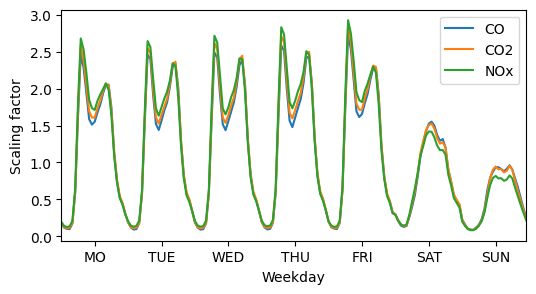

In [49]:
fig, ax = plt.subplots(figsize=(6, 3))

start_time = f'{year}-04-08'
end_time = f'{year}-04-14'

temp_profile.loc['CO', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax, label = 'CO')
temp_profile.loc['CO2(rep)', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax, label = 'CO2')
temp_profile.loc['NOx', year].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax, label = 'NOx')
    
xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')
ax.set_xticks(xticks)
ax.set_xticklabels(['MO', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
# Set major formatter to display the day of the week (Monday to Sunday)
plt.minorticks_off()
plt.xticks()

ax.set_xlabel('Weekday')
ax.set_ylabel('Scaling factor')
plt.legend()


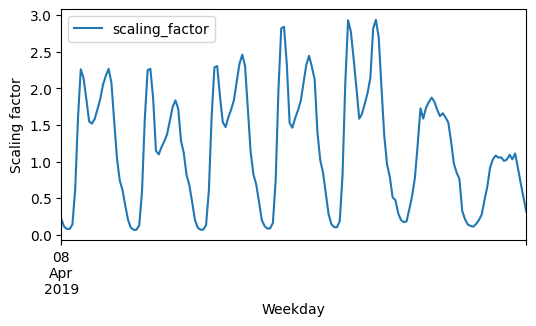

In [51]:
# now plot cold start emission timeprofiles

fig, ax = plt.subplots(figsize=(6, 3))

start_time = f'{year}-04-08'
end_time = f'{year}-04-14'

temp_cold_start.loc['CO', year].loc[start_time : end_time].plot(ax = ax, label = 'NOx')
#temp_cold_start['NOx'].loc[start_time : end_time].plot(ax = ax, label = 'NOx')
#temp_cold_start['CO'].loc[start_time : end_time].plot(ax = ax, label = 'CO')


#xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')
#ax.set_xticks(xticks)
#ax.set_xticklabels(['MO', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
# Set major formatter to display the day of the week (Monday to Sunday)
plt.minorticks_off()
plt.xticks()

ax.set_xlabel('Weekday')
ax.set_ylabel('Scaling factor')
plt.legend()

plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

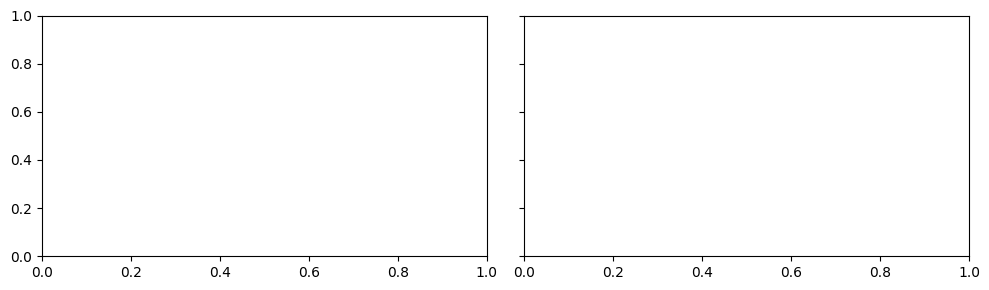

In [52]:
# make a combiend plot
fig, ax = plt.subplots(1,2, figsize=(10, 3), sharey=True, tight_layout=True)

start_time = '2019-01-01'
end_time = '2019-12-31'

temp_cold_start.loc[start_time : end_time].resample('1d').mean(numeric_only=True).plot(ax = ax[1], label = 'CO2')
#temp_cold_start['NOx'].loc[start_time : end_time].plot(ax = ax[1], label = 'NOx')
#temp_cold_start['CO'].loc[start_time : end_time].plot(ax = ax[1], label = 'CO')

temp_profile.loc['NOx', '2019'].loc[start_time:end_time]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[0], label = 'CO2')



xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')

#for x in ax: 

    #x.set_xticks(xticks)
    #x.set_xticklabels(['MO', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
    # Set major formatter to display the day of the week (Monday to Sunday)
    #x.minorticks_off()
    #plt.minorticks_off()
    #plt.xticks()
    #x.set_xlabel('Weekday', font = 'Helvetica', fontsize = 12)
    #x.set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)

ax[0].set_title('Hot Exhaust Emissions',font = 'Helvetica', fontsize = 12)
ax[1].set_title('Cold Start Excess Emissions',font = 'Helvetica', fontsize = 12)
 
#plt.legend()
plt.show()

In [ ]:
temp_cold_start[temp_cold_start['component']=='CO2(rep)']

,year,component,scaling_factor
timestamp,,,
2019-01-01 00:00:00,2019,CO2(rep),0.196580
2019-01-01 01:00:00,2019,CO2(rep),0.156840
2019-01-01 02:00:00,2019,CO2(rep),0.104089
2019-01-01 03:00:00,2019,CO2(rep),0.085773
2019-01-01 04:00:00,2019,CO2(rep),0.076874
...,...,...,...
2019-12-30 20:00:00,2019,CO2(rep),0.927845
2019-12-30 21:00:00,2019,CO2(rep),0.735450
2019-12-30 22:00:00,2019,CO2(rep),0.651452


In [ ]:

temp_cold_start[temp_cold_start['component']=='CO2'].loc[start_time : end_time].resample('1d').mean().plot(ax = ax[1], label = 'CO2')
#temp_cold_start['NOx'].loc[start_time : end_time].plot(ax = ax[1], label = 'NOx')
#temp_cold_start['CO'].loc[start_time : end_time].plot(ax = ax[1], label = 'CO')

temp_profile.loc['NOx', '2022'].loc[start_time:end_time]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[0], label = 'CO2')



xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')

#for x in ax: 

    #x.set_xticks(xticks)
    #x.set_xticklabels(['MO', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
    # Set major formatter to display the day of the week (Monday to Sunday)
    #x.minorticks_off()
    #plt.minorticks_off()
    #plt.xticks()
    #x.set_xlabel('Weekday', font = 'Helvetica', fontsize = 12)
    #x.set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)

ax[0].set_title('Hot Exhaust Emissions',font = 'Helvetica', fontsize = 12)
ax[1].set_title('Cold Start Excess Emissions',font = 'Helvetica', fontsize = 12)
 
#plt.legend()
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
temp_cold_start[temp_cold_start['component']=='CO2(rep)'].loc[start_time : end_time].resample('1d').mean().plot(ax = ax[1], label = 'CO2')
#temp_cold_start['NOx'].loc[start_time : end_time].plot(ax = ax[1], label = 'NOx')
#temp_cold_start['CO'].loc[start_time : end_time].plot(ax = ax[1], label = 'CO')

temp_profile.loc['NOx', '2022'].loc[start_time:end_time]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[0], label = 'CO2')



xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')

#for x in ax: 

    #x.set_xticks(xticks)
    #x.set_xticklabels(['MO', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
    # Set major formatter to display the day of the week (Monday to Sunday)
    #x.minorticks_off()
    #plt.minorticks_off()
    #plt.xticks()
    #x.set_xlabel('Weekday', font = 'Helvetica', fontsize = 12)
    #x.set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)

ax[0].set_title('Hot Exhaust Emissions',font = 'Helvetica', fontsize = 12)
ax[1].set_title('Cold Start Excess Emissions',font = 'Helvetica', fontsize = 12)
 
#plt.legend()
plt.show()

KeyError: 'CO2(rep)'

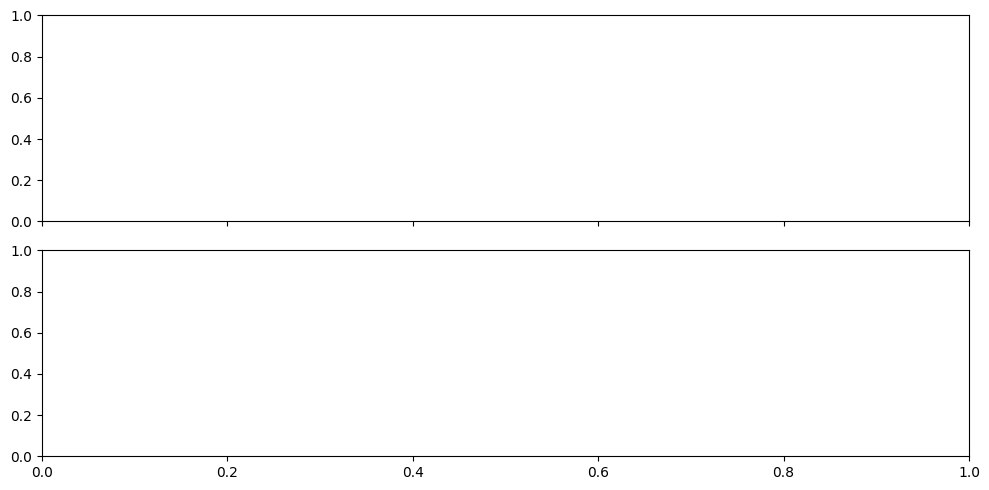

In [ ]:
# make a combiend plot
fig, ax = plt.subplots(2,1, figsize=(10, 5), sharex=True, tight_layout=True)

start_time = '2019-06-01'
end_time = '2019-06-30'


temp_cold_start['CO2(rep)'].loc[start_time : end_time].plot(ax = ax[1], label = 'CO2')
temp_cold_start['NOx'].loc[start_time : end_time].plot(ax = ax[1], label = 'NOx')
temp_cold_start['CO'].loc[start_time : end_time].plot(ax = ax[1], label = 'CO')

temp_profile.loc['CO', '2019'].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0], label = 'CO')
temp_profile.loc['CO2(rep)', '2019'].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0], label = 'CO2')
temp_profile.loc['NOx', '2019'].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0], label = 'NOx')

xticks = pd.date_range(start_time + ' 12:00', end_time + ' 12:00', freq='D')

ax[0].set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)
ax[1].set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)
ax[1].set_xlabel('')

ax[0].set_title('a) Hot Exhaust Emissions',font = 'Helvetica', fontsize = 12)
ax[1].set_title('b) Cold Start Excess Emissions',font = 'Helvetica', fontsize = 12)
 
plt.legend(bbox_to_anchor =(0.5,-0.4), ncol = 3, loc = 'lower center', fontsize =12)
plt.show()

In [ ]:
temp_cold_start[temp_cold_start['component']=='NOx']['scaling_factor'].loc[start_time_l : end_time_l].resample('1d').mean()
temp_cold_start[temp_cold_start['component'] == 'CO2(rep)'].resample('1d').mean()

timestamp
2019-01-01    0.682738
2019-01-02    1.900896
2019-01-03    2.087426
2019-01-04    1.990123
2019-01-05    1.449906
                ...   
2019-12-27    1.413173
2019-12-28    1.649975
2019-12-29    1.312592
2019-12-30    1.777094
2019-12-31    0.329788
Freq: D, Name: scaling_factor, Length: 365, dtype: float64

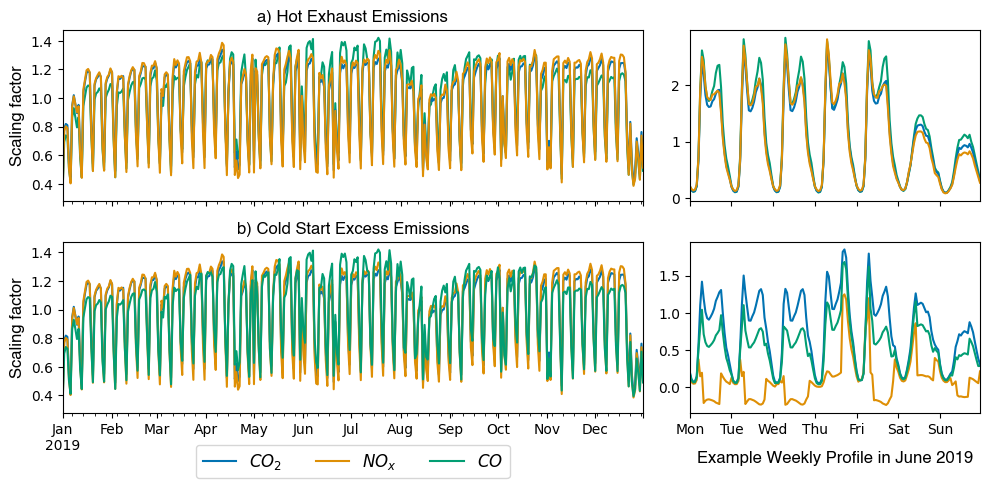

In [67]:
fig, ax = plt.subplots(2,2, figsize=(10, 5), sharex='col', tight_layout=True, width_ratios=[2, 1])

colors = sns.color_palette("colorblind")

start_time_l = '2019-01-01'
end_time_l = '2019-12-31'

temp_profile.loc['CO2(rep)', 2019]['scaling_factor'].loc[start_time_l : end_time_l].resample('1d').mean().plot(ax = ax[1,0], label = '$CO_2$', color = colors[0])
temp_profile.loc['NOx', 2019]['scaling_factor'].loc[start_time_l : end_time_l].resample('1d').mean().plot(ax = ax[1,0], label = '$NO_x$', color = colors[1])
temp_profile.loc['CO', 2019]['scaling_factor'].loc[start_time_l : end_time_l].resample('1d').mean().plot(ax = ax[1,0], label = '$CO$', color = colors[2])

temp_profile.loc['CO', '2019'].loc[start_time_l:end_time_l]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[0,0], label = '$CO$', color = colors[2])
temp_profile.loc['CO2(rep)', '2019'].loc[start_time_l:end_time_l]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[0,0], label = '$CO_2$', color = colors[0])
temp_profile.loc['NOx', '2019'].loc[start_time_l:end_time_l]\
    ['scaling_factor'].resample('1d').mean().plot(ax = ax[0,0], label = '$NO_x$', color = colors[1])
start_time = '2019-06-03'
end_time = '2019-06-09'
    
temp_cold_start.loc['CO2(rep)', 2019]['scaling_factor'].loc[start_time : end_time].plot(ax = ax[1,1], label = '$CO_2$', color = colors[0])
temp_cold_start.loc['NOx', 2019]['scaling_factor'].loc[start_time : end_time].plot(ax = ax[1,1], label = '$NO_x$', color = colors[1])
temp_cold_start.loc['CO', 2019]['scaling_factor'].loc[start_time : end_time].plot(ax = ax[1,1], label = '$CO$', color = colors[2])

temp_profile.loc['CO', '2019'].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0,1], label = '$CO$', color = colors[2])
temp_profile.loc['CO2(rep)', '2019'].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0,1], label = '$CO_2$', color = colors[0])
temp_profile.loc['NOx', '2019'].loc[start_time:end_time]\
    ['scaling_factor'].plot(ax = ax[0,1], label = '$NO_x$', color = colors[1])
    
ax[1,1].set_xticks(pd.date_range(start_time, end_time, freq='D'))
ax[1,1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',])
ax[1,1].set_xlabel('Example Weekly Profile in June 2019', fontsize = 12, font = 'Helvetica', labelpad = 10)
 
ax[1,0].set_xlabel(' ')
ax[1,0].legend(bbox_to_anchor =(0.5,-0.43), ncol = 3, loc = 'lower center', fontsize =12)

ax[0,0].set_title('a) Hot Exhaust Emissions',font = 'Helvetica', fontsize = 12)
ax[1,0].set_title('b) Cold Start Excess Emissions',font = 'Helvetica', fontsize = 12)

ax[1,0].set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)
ax[0,0].set_ylabel('Scaling factor', font = 'Helvetica', fontsize = 12)

plt.show()